# Exploratory data analysis

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
realty_data = pd.read_csv('data.csv',index_col=0)
realty_df = realty_data.copy()

База данных о стоимости аренды квартир в Москве

В файле 24 столбца, 23368 строк

In [13]:
print('Уникальных значений по столбцам:')
realty_df.nunique()

Уникальных значений по столбцам:


ID  объявления              23368
Количество комнат              24
Тип                             1
Метро                        5866
Адрес                       12850
Площадь, м2                 11255
Дом                          2565
Парковка                        5
Цена                         3922
Телефоны                    13172
Описание                    23078
Ремонт                          4
Площадь комнат, м2           3990
Балкон                         18
Окна                            3
Санузел                        20
Можно с детьми/животными        3
Дополнительно                 528
Название ЖК                  1798
Серия дома                    393
Высота потолков, м             95
Лифт                           34
Мусоропровод                    2
Ссылка на объявление        23368
dtype: int64

In [14]:
print('Всего пропущенных значений:',realty_df.isna().sum().sum())
print('Пропущенных значений по столбцам:')
realty_df.isna().sum()

Всего пропущенных значений: 118063
Пропущенных значений по столбцам:


ID  объявления                  0
Количество комнат            1041
Тип                             0
Метро                        1315
Адрес                           0
Площадь, м2                     0
Дом                             0
Парковка                    13417
Цена                            0
Телефоны                        0
Описание                        0
Ремонт                       2755
Площадь комнат, м2           8910
Балкон                       7978
Окна                         6613
Санузел                      2672
Можно с детьми/животными     6096
Дополнительно                 357
Название ЖК                 17520
Серия дома                  21205
Высота потолков, м          12162
Лифт                         5500
Мусоропровод                10522
Ссылка на объявление            0
dtype: int64

## Саммари по признакам и их наполнению:
| Признак     | Количество Nan | Тип данных | Предполагаемый тип данных | Комментарий
| ----------- | ----------- |----------- | ----------- |----------- |
| ID  объявления  | 0       | int64      | int64       | идентификатор      |
| Количество комнат  | 1041      | object      | int64       |      |
| Тип  | 0       | object      | cat       | только 1 вариант      |
| Метро  | 1315     | object      | cat       | в представленном виде не имеет статистической значимости, нужно сокращать     |
| Адрес  | 0       | object      | cat       | в представленном виде не имеет статистической значимости, нужно сокращать      |
| Площадь  | 0       | object      | int64       |  неясный формат     |
| Дом  | 0       | object      | object       |  нужно выделить отдельные признаки     |
| Парковка  | 13417      | object      | cat       |   большое количество пропущенных    |
| Цена  | 0       | object      | float64       | неподходящий формат      |
| Телефоны  | 0       | object      | int64       | не имеет статистической значимости      |
| Описание  | 0       | object      | object       | не имеет статистической значимости      |
| Ремонт  | 2755     | object      | cat       |       |
| Площадь комнат  | 8910    | object     | int64       |   формат зависит от показателя количество комнат    |
| Балкон  | 7978       | object      | cat       |   большое количество пропущенных   |
| Окна  | 6613      | object      | cat       |    большое количество пропущенных  |
| Санузел  | 2672       | object      | cat       |       |
| Можно с детьми/животными  | 6096       | object      | cat       |       |
| Дополнительно  | 357       | object      | cat       | можно вывести признак касательно мебели      |
| Название ЖК  | 17520       | object      | object       | не имеет статистической значимости      |
| Серия дома  | 21205      | object      | object       | не имеет статистической значимости      |
| Высота потолков  | 12162      | int64      | int64       |   большое количество пропущенных    |
| Лифт  | 5500      | object      | cat       |   большое количество пропущенных    |
| Мусоропровод  | 10522      | object      | cat       |   большое количество пропущенных  |
| Ссылка на объявление  | 0      | object      | object       | не имеет статистической значимости      |


In [15]:
def get_monthly_payment(price):
    payment = float(price[:price.find(' ')])
    currency = price[price.find(' ')+1:price.find('/')]
    return payment, currency
realty_df['monthly_payment'], realty_df['currency'] = zip(*realty_df['Цена'].apply(get_monthly_payment))

## Гистограмма стоимости месячной аренды

Приведена для цен в рублях. В датасете присутвуют цены в иностранной валюте, однако таких записей всего 24.

In [16]:
fig = px.histogram(realty_df[realty_df['currency']=='руб.'], x="monthly_payment")
fig.show()

## Самые популярные записи в столбце "Станция метро"

Предлагается разделить признак на 2: расстояние до метро и станция

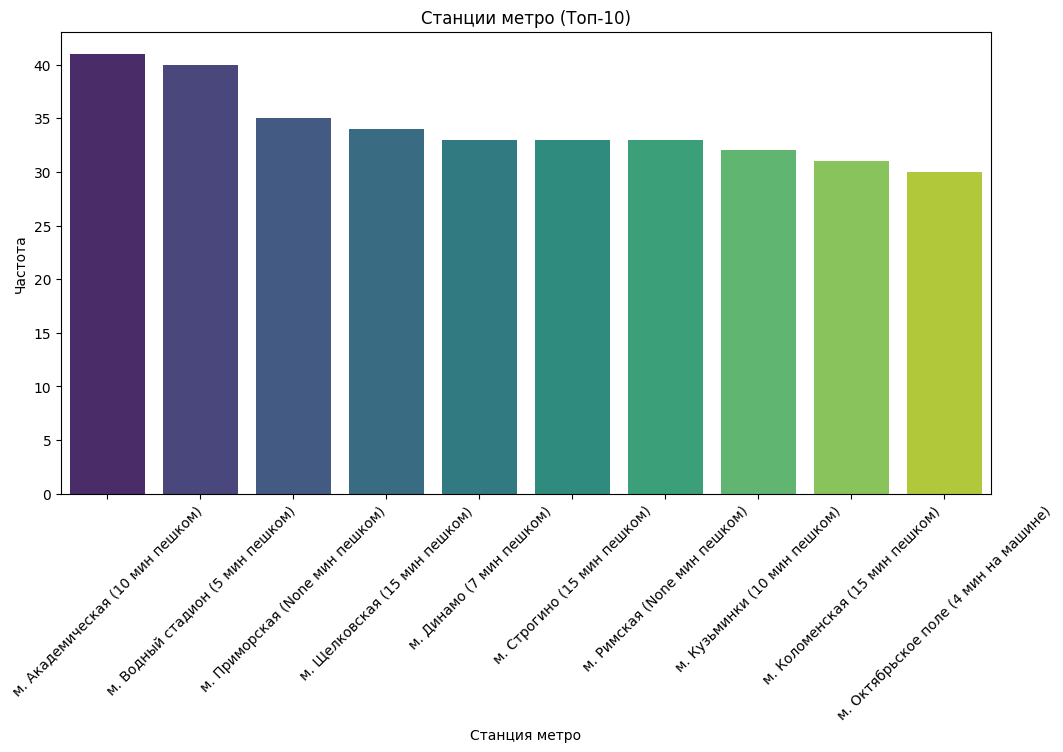

In [18]:
N = 10  # Задайте количество отображаемых категорий
top_10 = realty_df['Метро'].value_counts().head(N)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10.index, y=top_10.values, hue=top_10.index, palette='viridis')
plt.title(f'Станции метро (Топ-{N})')
plt.xlabel('Станция метро')
plt.ylabel('Частота')
plt.xticks(rotation=45)  # Поворот меток по x, если много категорий
plt.show()

## Информация о домах

Извлечение статистики об этажности и материале здания

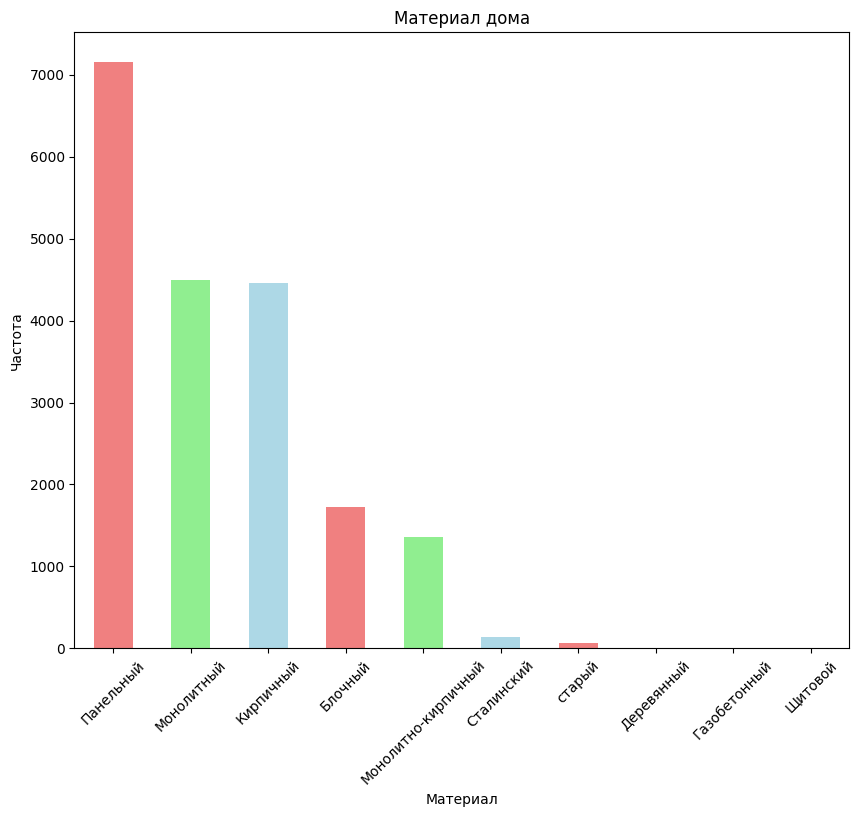

In [20]:
# Выделение информации о этажности
# Сначала извлечем этажность в отдельный столбец, затем построим столбчатую диаграмму
realty_df['Этаж'] = realty_df['Дом'].str.extract(r'(\d+)/').astype(int)

# Выделение информации о материале дома
# Посчитаем частоту каждого материала и построим круговую диаграмму
material_counts = realty_df['Дом'].str.extract(r',\s(.*?)(?:\s|$)')[0].value_counts()

plt.figure(figsize=(10, 8))
material_counts.plot(kind='bar', color=['lightcoral', 'lightgreen', 'lightblue'])
plt.title('Материал дома')
plt.xlabel('Материал')
plt.ylabel('Частота')
plt.xticks(rotation=0)
plt.xticks(rotation=45)  
plt.show()

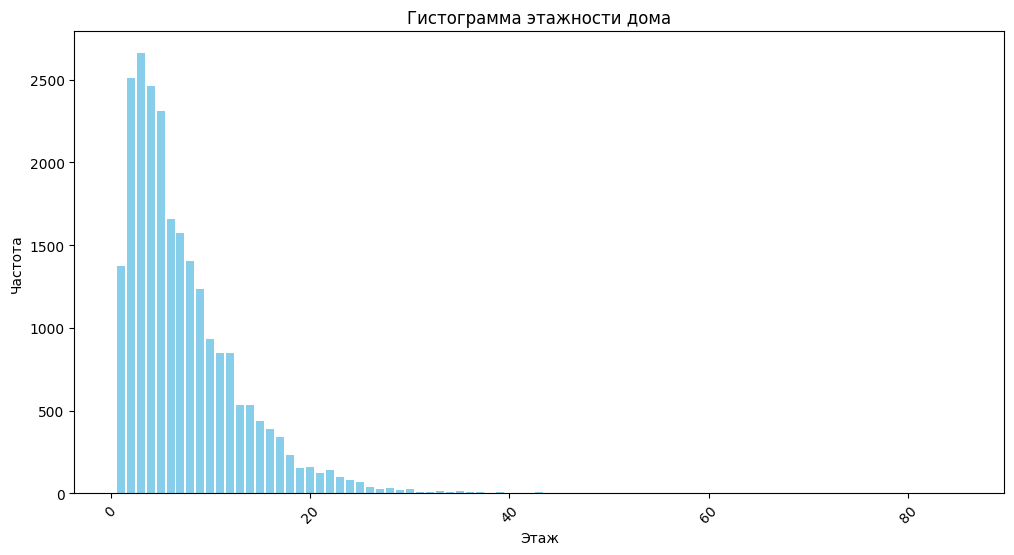

In [21]:
# # Выделение информации о этажности
# Сначала извлечем этажность в отдельный столбец, затем построим столбчатую диаграмму
# Выделение информации о этажности в столбце 'Дом' с проверкой на NaN
# Подсчет частоты этажей
floor_counts = realty_df['Этаж'].value_counts().sort_index()

# Гистограмма для частоты этажности
plt.figure(figsize=(12, 6))
plt.bar(floor_counts.index, floor_counts, color='skyblue')
plt.title('Гистограмма этажности дома')
plt.xlabel('Этаж')
plt.ylabel('Частота')
plt.xticks(rotation=45)
plt.show()

## Проверка адреса на город

Исследование касается квартир в Москве. В датасете были обнаружены другие города: 

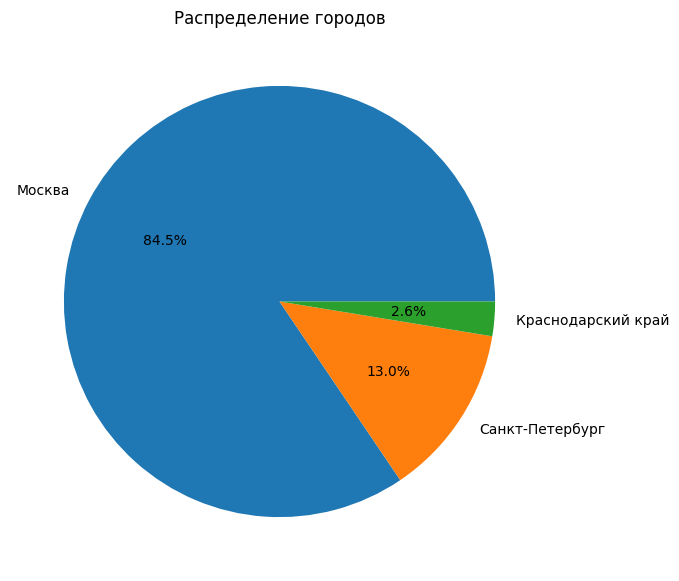

In [24]:
realty_df['Город'] = realty_df['Адрес'].str.split(',').str[0] # вводим новый столбец
# тут пайчарт
city_counts = realty_df['Город'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%')
plt.title('Распределение городов')
plt.show()

## Исследование столбца "Парковка"

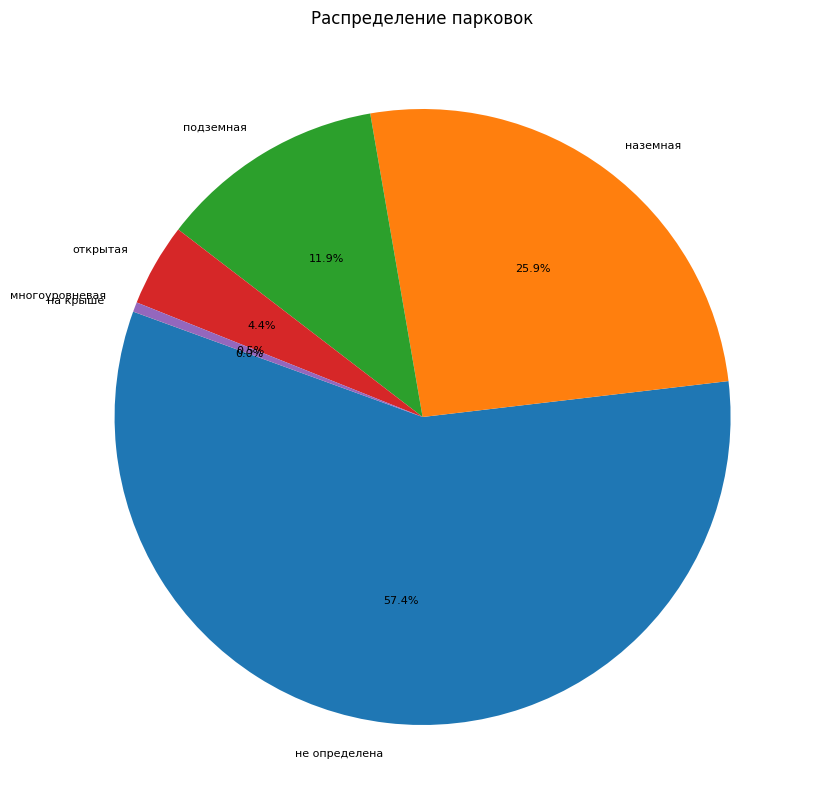

In [30]:
realty_df['Парковка'].fillna('не определена', inplace=True)
realty_df['Парковка'].value_counts()
parking_counts = realty_df['Парковка'].value_counts()
# Создание пай-чарта
plt.figure(figsize=(10, 10))  # Устанавливаем размер графика
plt.pie(parking_counts, labels=parking_counts.index, autopct='%1.1f%%', startangle=160, textprops={'fontsize': 8})
# Добавление заголовка
plt.title('Распределение парковок')
# Отображение пай-чарта
plt.show()